Files already downloaded and verified


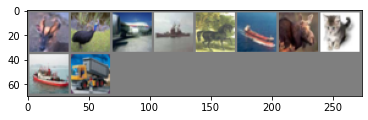

 deer  bird plane  ship horse  ship  deer   cat  ship truck


In [2]:
#training data

#importing the required libraries to create a NN
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#downloading in a set of images for training the neural network
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#loading in a set of images for training and selecting the batch size
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)
#these are the objects the image contains
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))













In [3]:
#creating a convulation neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.softmax= nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x


net = Net()
#printing out the NN
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

#saving the trained model.
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.303
[1,  4000] loss: 2.302
[2,  2000] loss: 2.302
[2,  4000] loss: 2.301
[3,  2000] loss: 2.254
[3,  4000] loss: 2.197
[4,  2000] loss: 2.152
[4,  4000] loss: 2.135
[5,  2000] loss: 2.122
[5,  4000] loss: 2.107
Finished Training


Files already downloaded and verified


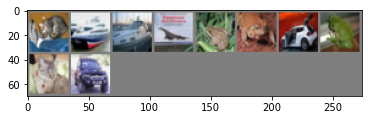

GroundTruth:    cat


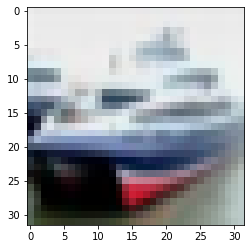

the probability is  tensor([[4.5128e-06, 9.9870e-01, 3.1269e-08, 4.2281e-08, 2.9362e-12, 2.1907e-06,
         1.9883e-12, 3.1928e-11, 1.2494e-03, 3.9600e-05]],
       grad_fn=<SoftmaxBackward>)
Predicted:    car
car


In [6]:
#testing the model


#loading in the test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)
#getting the images and labels from the testloader
dataiter = iter(testloader)
images, labels = dataiter.next()
#printing the first 10 images because the batch size is set to 10
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

#creating a variable for the NN and then loading in the saved model
net = Net()
net.load_state_dict(torch.load(PATH))
#net.eval

#Returns a new tensor with a dimension of size one inserted at the specified position.
image = torch.unsqueeze(images[1], 0)
#printing out the image.
imshow(torchvision.utils.make_grid(image))
outputs = net(image)
#outputs = net(images[0])

#returns the maximum value out of all the other input
_, predicted = torch.max(outputs, 1)

#softmaxprob=torch.nn.Softmax2d(outputs)
#print the probability of each class
print("the probability is ", (outputs))

#prints out the predicted classes so the class with the highest probability
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))
for j in range(1):
  if classes[predicted[j]]==classes[1] or classes[predicted[j]]==classes[5] :
    print(classes[predicted[j]])